In [1]:
%load_ext autoreload
%autoreload 2

In [210]:
from src.data import load_data_generator, get_preprocess_layers
import tensorflow as tf
from tensorflow import keras
from src.models.dense import dense

from pathlib import Path
import pickle
import pandas as pd

import matplotlib.pyplot as plt


In [132]:
dataset = 'fashion_mnist'

In [244]:
path = Path() / 'experiments' / dataset

In [286]:
histories = load_histories(path)

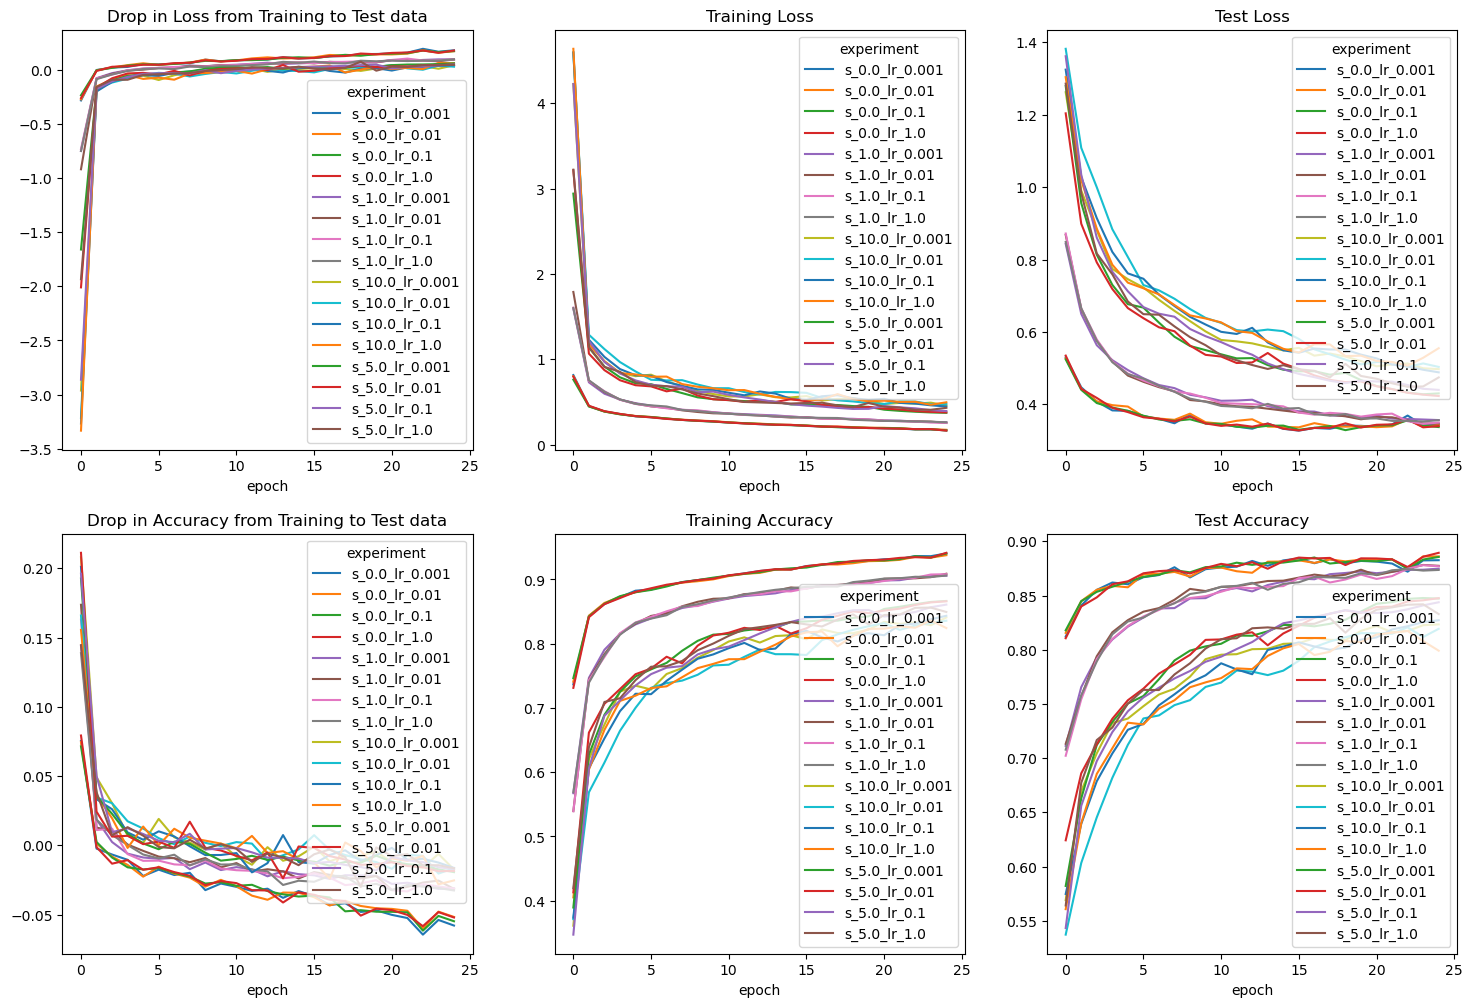

In [288]:
fig, ax = plot_histories(histories)

In [277]:
histories = pd.concat(histories, names=['experiment', 'epoch'])

In [279]:
histories.reset_index(inplace=True)

In [280]:
histories


,experiment,epoch,variable,value
0,s_5.0_lr_0.01,0,loss,3.214399
1,s_5.0_lr_0.01,1,loss,1.065931
2,s_5.0_lr_0.01,2,loss,0.872565
3,s_5.0_lr_0.01,3,loss,0.754518
4,s_5.0_lr_0.01,4,loss,0.696240
...,...,...,...,...
1495,s_10.0_lr_0.001,20,val_accuracy,0.821900
1496,s_10.0_lr_0.001,21,val_accuracy,0.816200
1497,s_10.0_lr_0.001,22,val_accuracy,0.817300
1498,s_10.0_lr_0.001,23,val_accuracy,0.822600


In [283]:
df_train = histories[histories['variable'] == 'loss'].pivot(columns='experiment', index='epoch', values='value')
df_test = histories[histories['variable'] == 'val_loss'].pivot(columns='experiment', index='epoch', values='value')
df_drop = df_test - df_train

In [281]:
df_plot = histories[histories['variable'] == 'loss'].pivot(columns='experiment', index='epoch', values='value')

In [282]:
df_plot

experiment,s_0.0_lr_0.001,s_0.0_lr_0.01,s_0.0_lr_0.1,s_0.0_lr_1.0,s_1.0_lr_0.001,s_1.0_lr_0.01,s_1.0_lr_0.1,s_1.0_lr_1.0,s_10.0_lr_0.001,s_10.0_lr_0.01,s_10.0_lr_0.1,s_5.0_lr_0.001,s_5.0_lr_0.01,s_5.0_lr_0.1,s_5.0_lr_1.0
epoch,,,,,,,,,,,,,,,
0,0.814930,0.801648,0.761956,0.797775,1.594425,1.788466,1.605433,1.600084,4.225064,4.597285,4.591784,2.940409,3.214399,4.224614,3.220761
1,0.451126,0.450522,0.447101,0.455731,0.729813,0.746136,0.746110,0.754393,1.190741,1.287452,1.229374,1.137226,1.065931,1.214456,1.144837
2,0.389232,0.388140,0.387640,0.392026,0.596479,0.615417,0.625879,0.620468,0.976529,1.119495,1.027975,0.914695,0.872565,0.968687,0.910795
3,0.358600,0.356919,0.354748,0.360102,0.528678,0.527550,0.525665,0.529262,0.841511,0.967392,0.885377,0.788413,0.754518,0.834290,0.853357
4,0.331986,0.335837,0.334019,0.333771,0.485597,0.480448,0.476484,0.478132,0.802216,0.857587,0.812915,0.719223,0.696240,0.752765,0.733107
5,0.321136,0.324054,0.323308,0.319471,0.456145,0.448034,0.450507,0.460267,0.819410,0.760115,0.806141,0.708393,0.682508,0.702119,0.691588
6,0.305189,0.305918,0.306113,0.301557,0.435857,0.431720,0.425909,0.447204,0.741344,0.752238,0.733312,0.652744,0.624360,0.683858,0.685209
7,0.289609,0.292895,0.289770,0.289813,0.408092,0.402249,0.408281,0.406142,0.684393,0.755428,0.689136,0.603901,0.656165,0.677620,0.647246
8,0.280489,0.282441,0.278403,0.280260,0.395276,0.382505,0.401884,0.393478,0.626828,0.703849,0.646994,0.554023,0.574918,0.613551,0.599122


In [276]:
test

variable     value
experiment      epoch                        
s_5.0_lr_0.01   0              loss  3.214399
                1              loss  1.065931
                2              loss  0.872565
                3              loss  0.754518
                4              loss  0.696240
...                             ...       ...
s_10.0_lr_0.001 20     val_accuracy  0.821900
                21     val_accuracy  0.816200
                22     val_accuracy  0.817300
                23     val_accuracy  0.822600
                24     val_accuracy  0.823400

[1500 rows x 2 columns]

In [266]:
test = pd.concat(histories)

In [268]:
test['variable']

s_5.0_lr_0.01    0             loss
                 1             loss
                 2             loss
                 3             loss
                 4             loss
                           ...     
s_10.0_lr_0.001  95    val_accuracy
                 96    val_accuracy
                 97    val_accuracy
                 98    val_accuracy
                 99    val_accuracy
Name: variable, Length: 1100, dtype: object

In [271]:
df_history

,loss,accuracy,val_loss,val_accuracy
epoch,,,,
0,4.225064,0.361100,1.262260,0.5690
1,1.190741,0.620483,0.990426,0.6696
2,0.976529,0.674033,0.881083,0.7045
3,0.841511,0.725333,0.774477,0.7324
4,0.802216,0.734683,0.745718,0.7365
5,0.819410,0.728783,0.722936,0.7479
6,0.741344,0.752850,0.688843,0.7587
7,0.684393,0.762000,0.658231,0.7640
8,0.626828,0.778150,0.629916,0.7752


In [272]:
df_history.melt(ignore_index=False)

,variable,value
epoch,,
0,loss,4.225064
1,loss,1.190741
2,loss,0.976529
3,loss,0.841511
4,loss,0.802216
...,...,...
20,val_accuracy,0.821900
21,val_accuracy,0.816200
22,val_accuracy,0.817300


In [264]:
test

variable     value
experiment      epoch                        
s_5.0_lr_0.01   0              loss  3.214399
                1              loss  1.065931
                2              loss  0.872565
                3              loss  0.754518
                4              loss  0.696240
...                             ...       ...
s_10.0_lr_0.001 95     val_accuracy  0.821900
                96     val_accuracy  0.816200
                97     val_accuracy  0.817300
                98     val_accuracy  0.822600
                99     val_accuracy  0.823400

[1100 rows x 2 columns]

In [259]:
df_history.melt()

,variable,value
0,loss,4.225064
1,loss,1.190741
2,loss,0.976529
3,loss,0.841511
4,loss,0.802216
...,...,...
95,val_accuracy,0.821900
96,val_accuracy,0.816200
97,val_accuracy,0.817300
98,val_accuracy,0.822600


In [248]:
histories = load_histories(path)

In [249]:
histories

,experiment,epoch,variable,value
0,s_5.0_lr_0.01,0,epoch,0.0000
1,s_5.0_lr_0.01,1,epoch,1.0000
2,s_5.0_lr_0.01,2,epoch,2.0000
3,s_5.0_lr_0.01,3,epoch,3.0000
4,s_5.0_lr_0.01,4,epoch,4.0000
...,...,...,...,...
870,s_10.0_lr_0.001,120,val_accuracy,0.8219
871,s_10.0_lr_0.001,121,val_accuracy,0.8162
872,s_10.0_lr_0.001,122,val_accuracy,0.8173
873,s_10.0_lr_0.001,123,val_accuracy,0.8226
